In [31]:
!pip install numpy pillow matplotlib torch torchvision PytorchWildlife --quiet
!pip install --upgrade ultralytics PytorchWildlife

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------- -------------------- 0.5/1.1 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.197
    Uninstalling ultralytics-8.3.197:
      Successfully uninstalled ultralytics-8.3.197


In [32]:
from pathlib import Path
import numpy as np
from PytorchWildlife.models import detection as pw_detection
from PytorchWildlife.models import classification as pw_classification
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
  # Cargar detector y clasificador preseleccionados
detector = pw_detection.MegaDetectorV6(version="MDV6-yolov9-c")

100% [........................................................................] 51572347 / 51572347Ultralytics 8.3.197  Python-3.13.5 torch-2.8.0+cpu CPU (AMD Ryzen 3 3300U with Radeon Vega Mobile Gfx)
YOLOv9c summary (fused): 156 layers, 25,321,561 parameters, 0 gradients, 102.3 GFLOPs


In [14]:
clasificador =clasificador = pw_classification.AI4GOpossum()

Downloading: "https://zenodo.org/records/10023414/files/OpossumClassification_v0.0.0.ckpt?download=1" to C:\Users\José Jorge/.cache\torch\hub\checkpoints\OpossumClassification_v0.0.0.ckpt


100%|███████████████████████████████████████████████████████████████████████████████| 188M/188M [00:54<00:00, 3.62MB/s]


In [15]:
def recortar_con_margen(imagen: np.ndarray, caja: np.ndarray, margen: int = 5) -> np.ndarray:
    x1, y1, x2, y2 = caja.astype(int)
    alto, ancho, _ = imagen.shape
    x1 = max(0, x1 - margen)
    y1 = max(0, y1 - margen)
    x2 = min(ancho, x2 + margen)
    y2 = min(alto, y2 + margen)
    return imagen[y1:y2, x1:x2]

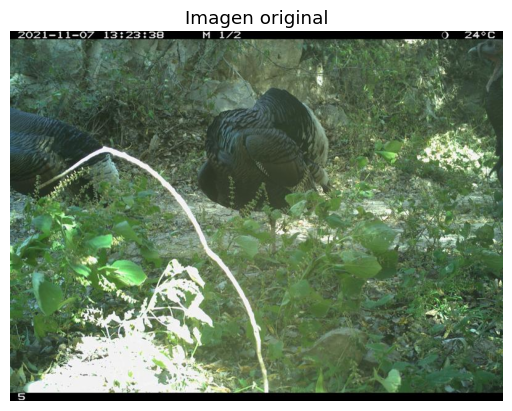

In [16]:
ruta_imagen = Path("D:/Archivos de Jorge/Prueba/foto9.jpg")
imagen = np.array(Image.open(ruta_imagen).convert("RGB"))
plt.imshow(imagen)
plt.title("Imagen original")
plt.axis("off")
plt.show()

In [35]:
# Detectar
detecciones = list(detector.predictor(imagen))

KeyError: 51

In [26]:
list(detecciones)

KeyError: 51

In [23]:
# Iterar sobre cada detección
for i, result in enumerate(detecciones):
    cajas = result.boxes.xyxy.numpy()  

    for j, caja in enumerate(cajas):
        recorte = recortar_con_margen(result.orig_img, caja, margen=10)
        especie_predicha = clasificador.single_image_classification(recorte)

# Mostrar recorte
        plt.imshow(recorte)
        plt.title(f"Especie predicha: {especie_predicha}")
        plt.axis("off")
        plt.show()

KeyError: 51